In [ ]:
### Install and Import packages

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 780 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def portfolio_creation_and_optimization(stock_list,num_of_portfolios,risk_free):
    
    #Loading the data
    data = yf.download(stock_list, start= '2012-01-01', end = '2022-01-01', interval = '1mo')
    data = data['Adj Close']
    
    #taking log returns of the monthly data.
    returns = np.log(data).diff()
    
    #These are lists to store the respective metrics of all portfolios
    portfolio_return = []
    portfolio_risk = []
    portfolio_sharpe = []
    portfolio_weights = []
    
    # I have considered negative weights by assigning the minimum value od 0.1 or 10%
    low = -0.1
    k = len(stock_list) #Number of tickers
    
    #Covariance Matrix for the annual returns of each stock 
    covariance_matrix = returns.cov() * 12  # Multiplied by 12 to make annual returns
    for portfolio_len in range(num_of_portfolios):
        a = np.random.rand(k)
        a = (a/a.sum()*(1-low*k)) #division factor to generate random numbers that have both postive and neagtive values sum to 1
        weights = a + low 

        #checking if the sum is 1
        assert np.isclose(weights.sum(), 1)

        portfolio_weights.append(weights)

      #calculating mean returns (multiplying by 12 because we have monthly returns data to make it annualized i am multiplying by 12)
        annualized_returns = np.sum(returns.mean() * weights) * 12
        portfolio_return.append(annualized_returns)

      #matrix covariance and portfolio_variance
        portfolio_variance = np.dot(weights.T,np.dot(covariance_matrix,weights))

      #To calculate sharpe we need portfolio standard deviation 
        portfolio_stdev = np.sqrt(portfolio_variance)
        portfolio_risk.append(portfolio_stdev)

      #sharpe ratio for returns and standard deviation considering risk free rate as 0%
        sharpe_ratio = (annualized_returns - risk_free)/portfolio_stdev
        portfolio_sharpe.append(sharpe_ratio)
    
    #Converting every parameter into a dataframe
    data = pd.DataFrame({'Return': portfolio_return,'Risk': portfolio_risk, 'Sharpe': portfolio_sharpe, 'Weights': portfolio_weights})
    
    #These lines will give the min and max rows which has min risk, max return and max sharpe.
    minimum_risk = data.iloc[data['Risk'].idxmin()]
    maximum_return = data.iloc[data['Return'].idxmax()]
    maximum_sharpe = data.iloc[data['Sharpe'].idxmax()]
    
    #These lines will print the weights and the parameters in a good way above the portfolio visualizations.
    print('Lowest Risk')
    a = []
    for i,j in zip(stock_list,minimum_risk.Weights):
        element = str(i)+' : '+str(j)
        a.append(element)
    print(a)
    print(minimum_risk)
    print('')

    print('Maximum Return')
    b = []
    for i,j in zip(stock_list,maximum_return.Weights):
        element = str(i)+' : '+str(j)
        b.append(element)
    print(b)
    print(maximum_return)
    print('')

    print('Maximum Sharpe')
    c = []
    for i,j in zip(stock_list,maximum_sharpe.Weights):
        element = str(i)+' : '+str(j)
        c.append(element)
    print(c)
    print(maximum_sharpe)
    print('')
    
    #This function will return visualizations of the 10000 portfolios that we created above.
    return portfolio_visualizations(portfolio_return,portfolio_risk,portfolio_sharpe,maximum_sharpe,risk_free)

def portfolio_visualizations(portfolio_return,portfolio_risk,portfolio_sharpe,maximum_sharpe,risk_free):
    ### Your code here.
    cal = capital_allocation_line(maximum_sharpe,risk_free)
    plt.scatter(x=portfolio_risk,y=portfolio_return,c=portfolio_sharpe)
    plt.plot(cal.Risk,cal.Return)
    plt.title('CAL vs Portfolio Optimization')
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.legend(loc = 'upper left')
    plt.show()
    
def capital_allocation_line(maximum_sharpe,rf):
    #your code here
    weights = [0,1]
    Port_risk = []
    Port_return = []
    for i in weights:
        returns = i*maximum_sharpe.Return + (1-i)*rf
        risk = i*maximum_sharpe.Risk
        Port_return.insert(i,returns)
        Port_risk.insert(i,risk)
    return pd.DataFrame({'Weight': weights,'Risk': Port_risk,'Return': Port_return})
    

In [25]:
### Stock list and graph output

In [26]:
stock_list = ['BA','AAPL','HD', 'BAC', 'SBUX', 'RTX','XOM','BBY','HOG','IHG']

[*********************100%***********************]  10 of 10 completed


Lowest Risk
['BA : 0.13861118599710323', 'AAPL : -0.04818762959366657', 'HD : 0.03470351214274958', 'BAC : 0.10159452882165343', 'SBUX : 0.3537439101562273', 'RTX : -0.07443477002109407', 'XOM : 0.08051906813074733', 'BBY : 0.006881442737796228', 'HOG : 0.3461850049106704', 'IHG : 0.06038374671781327']
Return                                              0.262871
Risk                                                0.145949
Sharpe                                              1.801116
Weights    [0.13861118599710323, -0.04818762959366657, 0....
Name: 8682, dtype: object

Maximum Return
['BA : 0.39877307864075295', 'AAPL : 0.040219624512946944', 'HD : 0.369146016477056', 'BAC : 0.3056234842217609', 'SBUX : -0.0007562895414428839', 'RTX : -0.0991240016100454', 'XOM : -0.08505063733174968', 'BBY : -0.015179012425222668', 'HOG : 0.1310093211754467', 'IHG : -0.04466158411950303']
Return                                              0.394788
Risk                                                0.

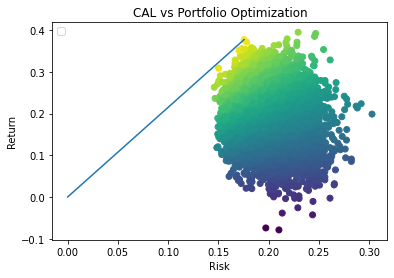

In [27]:
#parameters 
# stock_list
# number of portfolios
# risk-free rate = 0.0%
portfolio_creation_and_optimization(stock_list,10000,0)

#The output should be the portfolio graph and the CAL line

[*********************100%***********************]  10 of 10 completed


Lowest Risk
['BA : 0.07190206967990609', 'AAPL : 0.05988737045514406', 'HD : -0.02080317700306937', 'BAC : 0.13303049064136604', 'SBUX : 0.25587417643313604', 'RTX : 0.06008375688189141', 'XOM : -0.03898585072779648', 'BBY : -0.05869111416648038', 'HOG : 0.36831067915521687', 'IHG : 0.1693915986506855']
Return                                              0.198242
Risk                                                0.140727
Sharpe                                              1.394486
Weights    [0.07190206967990609, 0.05988737045514406, -0....
Name: 7226, dtype: object

Maximum Return
['BA : 0.7240674606484031', 'AAPL : 0.39314001845455215', 'HD : 0.011119146420275908', 'BAC : -0.08490547239340215', 'SBUX : 0.005565490000413273', 'RTX : -0.0015207385782404076', 'XOM : -0.010705438566929487', 'BBY : -0.047909477614394944', 'HOG : 0.09439485858714758', 'IHG : -0.08324584695782507']
Return                                              0.400998
Risk                                           

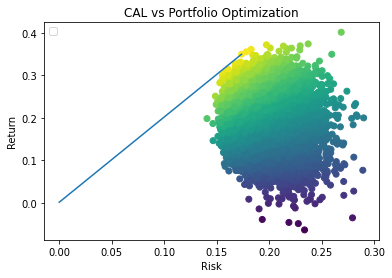

In [28]:
#parameters 
# stock_list
# number of portfolios
# risk-free rate = 0.2%
portfolio_creation_and_optimization(stock_list,10000,0.002)

#The output should be the portfolio graph and the CAL line

[*********************100%***********************]  10 of 10 completed


Lowest Risk
['BA : 0.12812513667952394', 'AAPL : 0.015136553927361573', 'HD : -0.07630307275696116', 'BAC : 0.08620865527693392', 'SBUX : 0.10856830443440796', 'RTX : 0.18080492880848817', 'XOM : 0.0007776792446867048', 'BBY : -0.09783127477934009', 'HOG : 0.4039097426611671', 'IHG : 0.25060334650373206']
Return                                              0.140725
Risk                                                0.144421
Sharpe                                              0.281991
Weights    [0.12812513667952394, 0.015136553927361573, -0...
Name: 584, dtype: object

Maximum Return
['BA : 0.46703696225665725', 'AAPL : 0.01417817544857193', 'HD : 0.336880886710912', 'BAC : 0.17394500229063173', 'SBUX : -0.04531637140559507', 'RTX : 0.006660137763301682', 'XOM : -0.09593782068504056', 'BBY : 0.065578844980651', 'HOG : 0.17560508463377297', 'IHG : -0.09863090199386297']
Return                                              0.391057
Risk                                                0.22

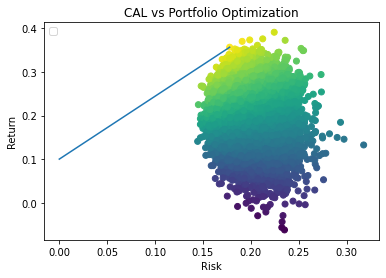

In [29]:
#parameters 
# stock_list
# number of portfolios
# risk-free rate = 10%
portfolio_creation_and_optimization(stock_list,10000,0.1)

#The output should be the portfolio graph and the CAL line